#TODO: delete this as each feature is processed

education-num: continuous.
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
sex: Female, Male.
capital-gain: continuous.
capital-loss: continuous.
hours-per-week: continuous.
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.


correlation_matrix = data_original.corr().round(2)
pl.figure(figsize=(10,8))
sb.heatmap(data=correlation_matrix, annot=True, center=0.0, cmap='coolwarm')


In [186]:
# Author: Caleb Woy

import numpy as np # linear algebra
import pandas as pd # data processing
from scipy.stats import kurtosis, skew # checking distributions
import scipy.stats as stat # plotting, mostly
import matplotlib.pyplot as pl # plotting
import seaborn as sb # plotting
import os

# Loading the training and test data sets into pandas
train_original = pd.read_csv("C:/Users/woybo/Desktop/Jupyter-Nbooks/1994Census/adult.data")
test_original = pd.read_csv("C:/Users/woybo/Desktop/Jupyter-Nbooks/1994Census/adult.test")

# Combining the training and test sets
frames = [train_original, test_original]
data_original = pd.concat(frames)

# print the head
data_original.head()

age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   cap-gain  cap-loss  hrsperwk          native   label  
0      2174         0        40   United-States   <=50K  
1         0         0        13   United-States   <=50K  
2         0         0        40   United-States   <=50K  
3         0         0        40   United-States   <=50K  
4         0         0        40            Cuba   <=50K

__**Business Understanding**__

Recorded originally by the US census bureau for the purpose of determining the correct number of House representatives per state via the 1990 census survey. Extracted by from the 1994 census database by Barry Becker under the following conditions: "((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))." Each record represents a single American Citizen that is > 16 years of age, has a difference between their Total income and Adjustments to income of > 100, has a fnlwgt attribute > 1, and works more than 0 hours per week.

The data set has been curated as a sample of the working population in the United States, for the purpose of predicting whether an individual makes > 50K per year. 

The feature "fnlwgt" was added by the dataset authors as a controlled estimate of certain socio-economic effects that take individual state population distributions into account. The controls accounted for are:

    | 1.  A single cell estimate of the population 16+ for each state.
    | 2.  Controls for Hispanic Origin by age and sex.
    | 3.  Controls by Race, age and sex.
    
Original data converted, by the data set authors, as follows:

    | 1. Discretized agrossincome into two ranges with threshold 50,000.
    | 2. Convert U.S. to US to avoid periods.
    | 3. Convert Unknown to "?"
    | 4. Run MLC++ GenCVFiles to generate data,test.
    
Here, numerical data (gross income) was simplified into binary categories of > 50K or <= 50K. MLC++ GenCVFiles is used to randomly split the data into training and tesing set for the purpose of ML application.

I have edited the files adult.data and adult.test to include column names.

__**Data Understanding**__

#######################################################################################################################################################
**label**: > 50K, <= 50K    /Categorical. Meaning: whether the indiviual makes more or less than 50K per year

In [187]:
feature_name = 'label'

# Checking counts per designation
data_original.groupby(feature_name).count()

age  workclass  fnlwgt  education  education-num  marital-status  \
label                                                                         
 <=50K   24720      24720   24720      24720          24720           24720   
 <=50K.  12435      12435   12435      12435          12435           12435   
 >50K     7841       7841    7841       7841           7841            7841   
 >50K.    3846       3846    3846       3846           3846            3846   

         occupation  relationship   race    sex  cap-gain  cap-loss  hrsperwk  \
label                                                                           
 <=50K        24720         24720  24720  24720     24720     24720     24720   
 <=50K.       12435         12435  12435  12435     12435     12435     12435   
 >50K          7841          7841   7841   7841      7841      7841      7841   
 >50K.         3846          3846   3846   3846      3846      3846      3846   

         native  
label            
 <=50K    24720  
 <=50K.   12435  
 >50K      7841  
 >50K.     3846

In [188]:
# the output here is erroneously grouped into 4 rows, I need to remove the period from every label in the test set to get an accurate count.
data_original[[feature_name]] = data_original[[feature_name]].replace([" <=50K.", " >50K."], [" <=50K", " >50K"])
data_original.groupby(feature_name).count()

age  workclass  fnlwgt  education  education-num  marital-status  \
label                                                                        
 <=50K  37155      37155   37155      37155          37155           37155   
 >50K   11687      11687   11687      11687          11687           11687   

        occupation  relationship   race    sex  cap-gain  cap-loss  hrsperwk  \
label                                                                          
 <=50K       37155         37155  37155  37155     37155     37155     37155   
 >50K        11687         11687  11687  11687     11687     11687     11687   

        native  
label           
 <=50K   37155  
 >50K    11687

In [189]:
# better, now we can view a summary
data_original[[feature_name]].describe()

label
count    48842
unique       2
top      <=50K
freq     37155

In [190]:
# So, there are 48842 values in the label column. There are 2 factor levels for the column. The most common label is '<= 50K' and it occurs 37155 times, 
# roughly 3/4 of the individuals.
# Now we'll check for missing values.
boolseries = data_original.apply(lambda x: True if x[feature_name] == ' ?' else False, axis=1)
print(f'Number of missing values (?): {len(boolseries[boolseries == True].index)}')
print(f'Number of null values: {data_original[[feature_name]].isnull().sum()}')

Number of missing values (?): 0
Number of null values: label    0
dtype: int64


In [191]:
# No missing values for our label, that's good. I'll move onto the next feature.

#######################################################################################################################################################
**age**    /Continuous. Meaning: the integer value age of the individual

In [192]:
feature_name = 'age'

# viewing a summary
data_original[[feature_name]].describe()

age
count  48842.000000
mean      38.643585
std       13.710510
min       17.000000
25%       28.000000
50%       37.000000
75%       48.000000
max       90.000000

In [193]:
#checking for missing values
boolseries = data_original.apply(lambda x: True if x[feature_name] == ' ?' else False, axis=1)
print(f'Number of missing values (?): {len(boolseries[boolseries == True].index)}')
print(f'Number of null values: {data_original[[feature_name]].isnull().sum()}')

Number of missing values (?): 0
Number of null values: age    0
dtype: int64


In [194]:
# No missing values on age, let's check skewness and kurtosis
print(f'Skewness: {skew(data_original.age)}')
print(f'Kurtosis: {kurtosis(data_original.age)}')

Skewness: 0.5575631924658626
Kurtosis: -0.18437271998309956


Text(0, 0.5, 'Frequency')

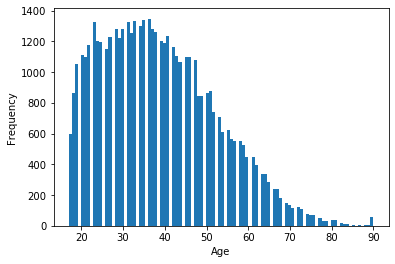

In [195]:
# The sample distribution of ages appears to be slightly right skewed with very slight negative kurtosis. This may need transformed for future modelling.
# Let's visualize this one to confirm the skewness.
x = data_original.age
pl.hist(x, bins=100)
pl.xlabel('Age')
pl.ylabel('Frequency')

In [196]:
# The values at the end of the right tail are definitely outliers however they're meaningful in our analysis (the elderly are important too). There don't appear to be any obvious
# errors caused by typos (like 500 or 0) 

#######################################################################################################################################################
**workclass**    /Categorical. Factor levels include: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
                  Meaning: This feature explains the general category of the economy the individual works within.

In [197]:
feature_name = 'workclass'

# viewing a summary
data_original[[feature_name]].describe()

workclass
count      48842
unique         9
top      Private
freq       33906

In [198]:
# Roughly 3/4 of our individuals appear to be working in the private sector. Describe returned that there are 9 factor levels in this feature when we know there are actually 
# only 8. so there must be missing values in this feature. Let's check.

boolseries = data_original.apply(lambda x: True if x[feature_name] == ' ?' else False, axis=1)
print(f'Number of missing values (?): {len(boolseries[boolseries == True].index)}')
print(f'Number of null values: {data_original[[feature_name]].isnull().sum()}')


Number of missing values (?): 2799
Number of null values: workclass    0
dtype: int64


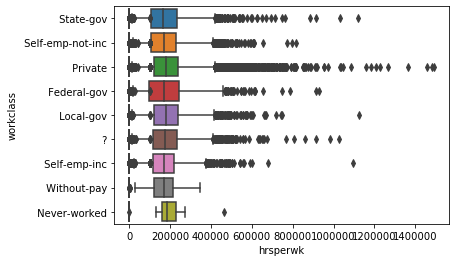

In [199]:
# There are 2799 ? values currently. None of them are Null or NaN values, so that's good. We have a few options here. The first is to impute the mode level (Private). 
# The second is to check if there are any other features here that might explain variation in with workclass, then if so, predict the missing workclass values. The third is 
# leave the ? value in as a placeholder unkown value and predict based on the effect of the level as we would any other feature.

# I'll make some boxplots to see if there's any explainable variation.

sb.boxplot( x=data_original["age"], y=data_original["workclass"] )
sb.boxplot( x=data_original["fnlwgt"], y=data_original["workclass"] )
sb.boxplot( x=data_original["education-num"], y=data_original["workclass"] )
sb.boxplot( x=data_original["cap-gain"], y=data_original["workclass"] )
sb.boxplot( x=data_original["cap-loss"], y=data_original["workclass"] )
sb.boxplot( x=data_original["hrsperwk"], y=data_original["workclass"] )

In [200]:
# None of these give off the appearance of explainatory variation that I'm looking to test with ANOVA so I'll impute the mode (Private) for the missing values. This can
# always be undone later during the modelling fase should we like to check how well we can predict with an unkown value effect.

# Checking the original counts at each factor level
data_original.groupby(feature_name).count()

# Making the replacement and recalculating the values
data_original[[feature_name]] = data_original[[feature_name]].replace([" ?"], [" Private"])
data_original.groupby(feature_name).count()

# All good.

age  fnlwgt  education  education-num  marital-status  \
workclass                                                                    
 Federal-gov        1432    1432       1432           1432            1432   
 Local-gov          3136    3136       3136           3136            3136   
 Never-worked         10      10         10             10              10   
 Private           36705   36705      36705          36705           36705   
 Self-emp-inc       1695    1695       1695           1695            1695   
 Self-emp-not-inc   3862    3862       3862           3862            3862   
 State-gov          1981    1981       1981           1981            1981   
 Without-pay          21      21         21             21              21   

                   occupation  relationship   race    sex  cap-gain  cap-loss  \
workclass                                                                       
 Federal-gov             1432          1432   1432   1432      1432      1432   
 Local-gov               3136          3136   3136   3136      3136      3136   
 Never-worked              10            10     10     10        10        10   
 Private                36705         36705  36705  36705     36705     36705   
 Self-emp-inc            1695          1695   1695   1695      1695      1695   
 Self-emp-not-inc        3862          3862   3862   3862      3862      3862   
 State-gov               1981          1981   1981   1981      1981      1981   
 Without-pay               21            21     21     21        21        21   

                   hrsperwk  native  label  
workclass                                   
 Federal-gov           1432    1432   1432  
 Local-gov             3136    3136   3136  
 Never-worked            10      10     10  
 Private              36705   36705  36705  
 Self-emp-inc          1695    1695   1695  
 Self-emp-not-inc      3862    3862   3862  
 State-gov             1981    1981   1981  
 Without-pay             21      21     21

#######################################################################################################################################################
**fnlwgt**    /Continuous. Meaning: The feature "fnlwgt" was added by the dataset authors as a controlled estimate of certain socio-economic effects that take individual state population distributions into account.

In [201]:
feature_name = 'fnlwgt'

# viewing a summary
data_original[[feature_name]].describe()

fnlwgt
count  4.884200e+04
mean   1.896641e+05
std    1.056040e+05
min    1.228500e+04
25%    1.175505e+05
50%    1.781445e+05
75%    2.376420e+05
max    1.490400e+06

In [202]:
# These are large numbers, any predictive model we apply on this data set would befit from some regularization here in the future. The max is exponetially larger than the mean.
# High values in fnlwgt will need investigated.

# Let's check for missing values.
boolseries = data_original.apply(lambda x: True if x[feature_name] == ' ?' else False, axis=1)
print(f'Number of missing values (?): {len(boolseries[boolseries == True].index)}')
print(f'Number of null values: {data_original[[feature_name]].isnull().sum()}')

Number of missing values (?): 0
Number of null values: fnlwgt    0
dtype: int64


In [203]:
# None, the data set authors created this feature so that should have been expected. Thanks authors!

# Checking skewness and kurtosis.
print(f'Skewness: {skew(data_original[feature_name])}')
print(f'Kurtosis: {kurtosis(data_original[feature_name])}')

Skewness: 1.438847687943433
Kurtosis: 6.057105240227166


Text(0, 0.5, 'Frequency')

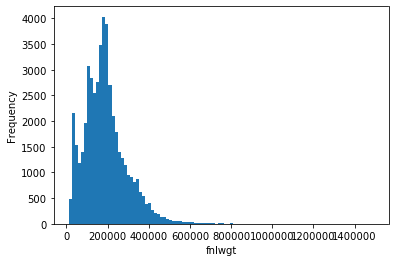

In [204]:
# The fnlwgt column has some strong right skew and high positive kurtosis. It should look like a big spike on the left side of the distribution.

# Let's visualize to confirm.
x = data_original[feature_name]
pl.hist(x, bins=100)
pl.xlabel('fnlwgt')
pl.ylabel('Frequency')


In [205]:
# Yup. This feature would benefit from a log transformation. Let's view the largest values of the distribution.

data_original.nlargest(10, ['fnlwgt']) 

age   workclass   fnlwgt      education  education-num  \
7974    27     Private  1490400   Some-college             10   
14449   25     Private  1484705   Some-college             10   
18138   39     Private  1455435     Assoc-acdm             12   
16739   45     Private  1366120      Assoc-voc             11   
15569   29     Private  1268339        HS-grad              9   
8258    35     Private  1226583      Bachelors             13   
14523   31     Private  1210504           10th              6   
5369    30     Private  1184622   Some-college             10   
25075   33     Private  1161363   Some-college             10   
29164   42   Local-gov  1125613        HS-grad              9   

               marital-status         occupation    relationship    race  \
7974       Married-civ-spouse    Exec-managerial         Husband   White   
14449                Divorced    Exec-managerial       Unmarried   White   
18138               Separated       Craft-repair   Not-in-family   White   
16739                Divorced      Other-service   Not-in-family   White   
15569   Married-spouse-absent       Tech-support       Own-child   Black   
8258       Married-civ-spouse              Sales         Husband   White   
14523      Married-civ-spouse       Adm-clerical            Wife   White   
5369       Married-civ-spouse   Transport-moving         Husband   Black   
25075               Separated       Tech-support       Unmarried   White   
29164                Divorced      Other-service   Not-in-family   Black   

           sex  cap-gain  cap-loss  hrsperwk          native   label  
7974      Male         0         0        40   United-States   <=50K  
14449   Female         0         0        25   United-States   <=50K  
18138     Male         0         0        40   United-States   <=50K  
16739   Female         0         0         8   United-States   <=50K  
15569     Male         0         0        40   United-States   <=50K  
8258      Male         0         0        52   United-States    >50K  
14523   Female         0         0        40   United-States   <=50K  
5369      Male         0         0        35   United-States   <=50K  
25075   Female         0         0        50        Columbia   <=50K  
29164     Male         0         0        40   United-States   <=50K

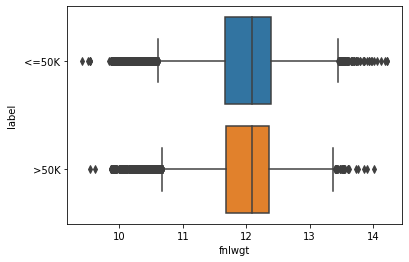

In [208]:
# 9 of these 10 make less than 50K, which leads me to believe the mean fnlwgt for the less than 50K group should be higher than the greater than 50k group.
# Let's check that.
sb.boxplot( x=np.log(data_original["fnlwgt"]), y=data_original["label"] )

In [ ]:
# Suprisingly little difference here. But, regarding the outliers at the tail of fnlwgt, none of these appear to be abnormal. We can't know forsure 
# without knowing how fnlwgt was calulated, yet the consistent increaing of the feature values up to the max appears systematic and not erroneous. I won't do anything
# special about them.

#######################################################################################################################################################
**Education**    /Categorical. Factor levels include: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
                  Meaning: How much schooling the individual has completed.